In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# find stats analysis (mean, min, max, and std), missing values, outliers (variable fare). 
# the variable from titanic.csv are survived,pclass,name,sex,age,fare,sibsp,parch
# survived: 0 = No, 1 = Yes (passenger survived)
# pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
# name: Name
# sex: male or female
# age: Age in years
# fare: Passenger fare
# sibsp: # of siblings / spouses aboard the Titanic
# parch: # of parents / children aboard the Titanic

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
print(df)

     survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
709         0       3               Rice, Mrs. William (Margaret Norton)   
710         0       2                              Montvila, Rev. Juozas   
711         1       1                       Graham, Miss. Margaret Edith   
712         1       1                              Behr, Mr. Karl Howell   
713         0       3                                Dooley, Mr. Patrick   

        sex   age     fare  sibsp  parch  
0      male  22.0   7.2500      1      0  
1

In [11]:
print(df[['survived', 'pclass', 'age', 'fare']].describe().round(2)) # stats analysis for selected variables
mean_survived = df['survived'].mean()
print(f"Mean Survival Rate: {mean_survived*100:.2f}%")

       survived  pclass     age    fare
count    714.00  714.00  714.00  714.00
mean       0.41    2.24   29.70   34.69
std        0.49    0.84   14.53   52.92
min        0.00    1.00    0.42    0.00
25%        0.00    1.00   20.12    8.05
50%        0.00    2.00   28.00   15.74
75%        1.00    3.00   38.00   33.38
max        1.00    3.00   80.00  512.33
Mean Survival Rate: 40.62%


In [5]:
# missing values
print(df.isnull().sum()) 

survived    0
pclass      0
name        0
sex         0
age         0
fare        0
sibsp       0
parch       0
dtype: int64


In [6]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fareOutlier = df[
    (df['fare'] > upper_bound)
]

print("=== lower and upper bound of fare ===")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("=== Outlier Threshold ===")
print(upper_bound)
print("=== Outlier Fare ===")
print(fareOutlier)
print("=== Summary Outlier Fare ===")
print(f"Jumlah outlier: {fareOutlier.shape[0]}")
print("=== Detail Outlier Fare ===")
print(fareOutlier[['name', 'fare']])

=== lower and upper bound of fare ===
Lower Bound: -29.937499999999996
Upper Bound: 71.3625
=== Outlier Threshold ===
71.3625
=== Outlier Fare ===
     survived  pclass                                               name  \
23          0       1                     Fortune, Mr. Charles Alexander   
26          0       1                            Meyer, Mr. Edgar Joseph   
38          1       1           Harper, Mrs. Henry Sleeper (Myna Haxtun)   
46          1       1                                Icard, Miss. Amelie   
47          0       1                        Harris, Mr. Henry Birkhardt   
..        ...     ...                                                ...   
656         1       1  Hays, Mrs. Charles Melville (Clara Jennings Gr...   
662         1       1          Stone, Mrs. George Nelson (Martha Evelyn)   
667         1       1                        Compton, Miss. Sara Rebecca   
684         1       1         Wick, Mrs. George Dennick (Mary Hitchcock)   
703         1    

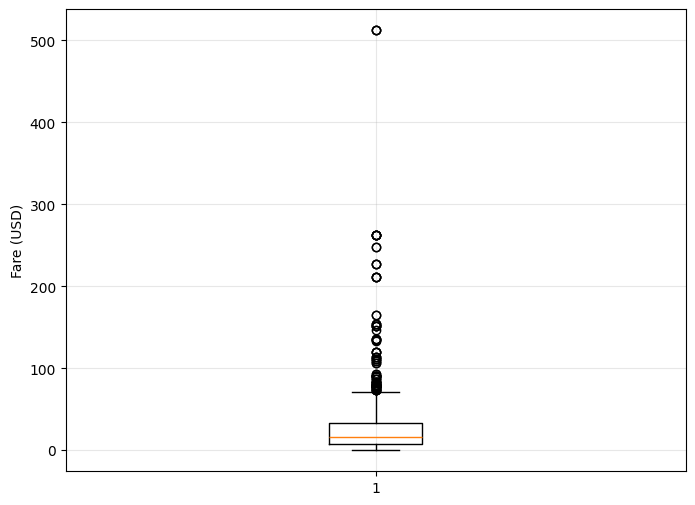

In [7]:
# outliers in fare
plt.figure(figsize=(8,6)) # improved figure size
plt.boxplot(df['fare'])
plt.ylabel('Fare (USD)')
plt.grid(True, alpha=0.3) # add grid for better readability
plt.show()

In [8]:
# summary analisis univariate
print("=== Summary Analisis Univariate ===")
print("Ringkasan statistik")
print(f"Usia: {df["age"].mean():.2f} ± {df["age"].std():.2f} tahun (min: {df["age"].min()}, max: {df["age"].max()})")
print(f"Fare: {df["fare"].mean():.2f} ± {df["fare"].std():.2f} USD (min: {df["fare"].min()}, max: {df["fare"].max()})")
print(f"Survival rate: {mean_survived*100:.2f}%")
print(f"Outlier fare: {fareOutlier.shape[0]} penumpang dengan fare di atas {upper_bound:.2f} USD ({fareOutlier.shape[0] / df.shape[0] * 100:.2f}%)")

print("\nInsight")
print(f"Fare memiliki variansi yang sangat besar (Range: ${df['fare'].max() - df['fare'].min():.2f})")
print(f"Terdapad {fareOutlier.shape[0]} dengan fare tertinggi/di atas ${upper_bound:.2f}")
print(f"Outlier fare kebanyakan dari passanger kelas {df[(df['fare'] > upper_bound)]['pclass'].mode()[0]}")
print(f"Survival rate keseluruhan adalah {mean_survived*100:.2f}%")

=== Summary Analisis Univariate ===
Ringkasan statistik
Usia: 29.70 ± 14.53 tahun (min: 0.42, max: 80.0)
Fare: 34.69 ± 52.92 USD (min: 0.0, max: 512.3292)
Survival rate: 40.62%
Outlier fare: 94 penumpang dengan fare di atas 71.36 USD (13.17%)

Insight
Fare memiliki variansi yang sangat besar (Range: $512.33)
Terdapad 94 dengan fare tertinggi/di atas $71.36
Outlier fare kebanyakan dari passanger kelas 1
Survival rate keseluruhan adalah 40.62%
